In [452]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline


In [521]:
from timeit import default_timer as timer

In [99]:
plt.rcParams['figure.figsize']=[7,4]

Simulating a path of Brownian motion with drift

In [298]:
np.random.seed(0)

def BMwithDrift(N,T,nu,sigma):
    Dt = T/float(N)
    Z=np.random.normal(size=N)
    W=[0]*N
    for i in range(N-1):
        W[i+1]=W[i] + nu*Dt + sigma*np.sqrt(Dt)*Z[i] 
    return W

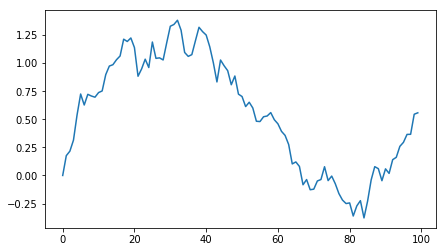

In [299]:
N = 100
T = 1.
nu= 0.
sigma= 1.

BMwithdrifPath = BMwithDrift(N,T,nu,sigma)

plt.plot(BMwithdrifPath)

Simulating M=npaths paths of Brownian motion

In [154]:
def PathsBMwithDrift(npaths,N,T,nu,sigma):
    Paths=[]
    for i in range(npaths):
        Paths.append(BMwithDrift(N,T,nu,sigma))
    return Paths

In [301]:
npaths = 10
N = 100
T = 1.
nu= 1.
sigma= 1.

Paths = PathsBMwithDrift(npaths,N,T,nu,sigma)

Paths

[[0,
  -0.10046165975264709,
  -0.093555285480042993,
  0.074331233961605833,
  0.0047811789562767215,
  -0.04186280641694521,
  -0.062631934153645388,
  -0.02572952683602072,
  0.036762259528567542,
  0.17350342501043323,
  0.23345324835729919,
  0.23724793577746581,
  0.37316464873854721,
  0.45357575095270541,
  0.31400779932700379,
  0.57664462336260369,
  0.76363676218227705,
  0.75681533990556971,
  0.80460635007941717,
  0.94704222507900115,
  0.93982214580931289,
  1.0228573248470147,
  1.1433151722041623,
  1.0518325814307183,
  1.0015993960724321,
  1.1037402358534902,
  1.1598216835683732,
  1.262201339599768,
  1.2589445381343962,
  1.2400440170389728,
  1.0501800694806356,
  0.94558002682989128,
  0.96028663629574063,
  1.0527423582521642,
  1.1158601949057338,
  1.1130359975029636,
  1.0958588408538938,
  1.1275768041177219,
  1.145397922226937,
  1.2958524737209083,
  1.3204965507687332,
  1.1823719545490032,
  1.0651161410457715,
  1.2269920747421295,
  1.11987602859712

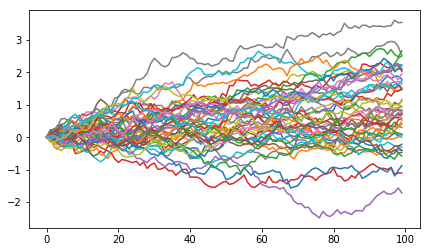

In [307]:
npaths = 50
N = 100
T = 1.
nu= 1.
sigma= 1.

Paths = PathsBMwithDrift(npaths,N,T,nu,sigma)

for p in Paths:
    plt.plot(p)

Simulating a path of Geometric Brownian motion I: Euler Scheme

In [162]:
def GBMwithDriftI(N,T,nu,sigma,S0):
    Dt = T/float(N)
    Z=np.random.normal(size=N)
    S=[S0]*N
    for i in range(N-1):
        S[i+1]=S[i]*(1+ nu*Dt) + S[i]*sigma*np.sqrt(Dt)*Z[i] 
    return S

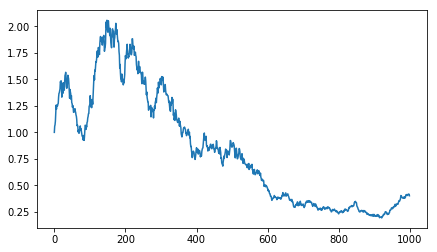

In [303]:
N= 1000
np.random.seed(0)
S0=1.

GBMwithdrifPathI = GBMwithDriftI(N,T,nu,sigma,S0)

plt.plot(GBMwithdrifPathI)

Simulating a path of Geometric Brownian motion II

In [190]:
def GBMwithDriftII(N,T,nu,sigma,S0):
    Dt=T/float(N)
    Z=np.random.normal(size=N)
    drift=[(nu-0.5*sigma**2)*Dt]*N
    S=S0*np.exp(np.cumsum(drift+sigma*np.sqrt(Dt)*Z))
    return S

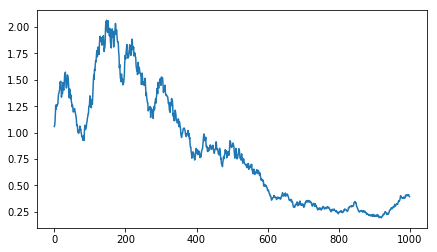

In [305]:
np.random.seed(0)
S0=1.
N = 1000
T = 1.
nu= 1.
sigma= 1.

GBMwithdrifPathII = GBMwithDriftII(N,T,nu,sigma,S0)

plt.plot(GBMwithdrifPathII)

In [199]:
def GBMwithDriftIII(N,T,nu,sigma,S0):
    S=S0*np.exp(BMwithDrift(N,T,nu-0.5*sigma**2,sigma))
    return S

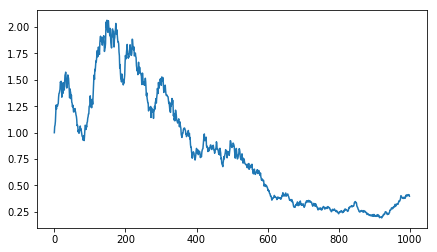

In [304]:
np.random.seed(0)
S0=1.
N = 1000
T = 1.
nu= 1.
sigma= 1.

GBMwithdrifPathIII = GBMwithDriftIII(N,T,nu,sigma,S0)

plt.plot(GBMwithdrifPathIII)

Simulating M paths of Geometric Brownian motion

In [216]:
def PathsGBMwithDrift(npaths,N,T,nu,sigma):
    Paths=[]
    for i in range(npaths):
        Paths.append(GBMwithDriftIII(N,T,nu,sigma,S0))
    return Paths

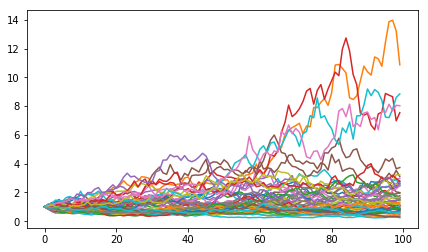

In [306]:
#np.random.seed(0)
npaths = 50
S0=1.
N = 100
T = 1.
nu= 1.
sigma= 1.

PathsGBM = PathsGBMwithDrift(npaths,N,T,nu,sigma)

for p in PathsGBM:
    plt.plot(p)

In [512]:
def MCCallpricesGBM(npaths,N,strike,T,S0,nu,sigma):
    PathsGBM = PathsGBMwithDrift(npaths,N,T,nu,sigma)
    null = [0]*npaths
    strikes = np.array([strike]*npaths)
    lastvalues = np.array([p[-1] for p in PathsGBM])
    callpayoffs = np.maximum(lastvalues-strikes,null)
    #lastvalues = [payoff(p[-1]) for p in PathsOU]
    averagepayoff = np.mean(callpayoffs)
    return averagepayoff

Black-Scholes Formula

In [513]:
def CallPriceBS(T,strike,S0,nu,sigma):
    k = np.log(S0/strike)
    d1 = (1/(sigma*np.sqrt(T)))*(k+(nu+0.5*sigma**2*T))
    d2 = d1-sigma*np.sqrt(T)
    CallPrice = norm.cdf(d1)*S0-norm.cdf(d2)*strike*np.exp(-nu*T)
    return CallPrice


Call Prices for a range of strikes

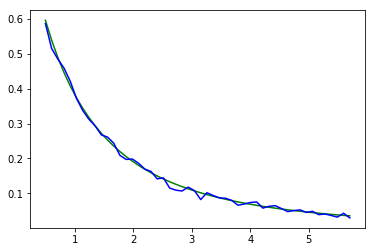

In [578]:
BSPrices = [CallPriceBS(1.,strike,1.,0.,1.) for strike in np.linspace(0.5,5.7,num=50)]
MCPricesGBM = [MCCallpricesGBM(10000,100,strike,1.,1.,0.,1.) for strike in np.linspace(0.5,5.7,num=50)]

plt.plot(np.linspace(0.5,5.7,num=50), BSPrices , 'g')
plt.plot(np.linspace(0.5,5.7,num=50), MCPricesGBM  , 'b')

Comparison of Call Prices via Black-Scholes formula (Exact solution, Benchmark) and Monte Carlo (Euler Scheme) 

In [541]:
def GMBCallpriceError(npaths,N,T,S0,nu,sigma,strike):
    return CallPriceBS(T,strike,S0,nu,sigma)-MCCallpricesGBM(npaths,N,strike,T,S0,nu,sigma)
    

In [545]:
GMBCallpriceError(1000000,100,1.,1.,0.,1.,strike=1)

0.0017622106899330969

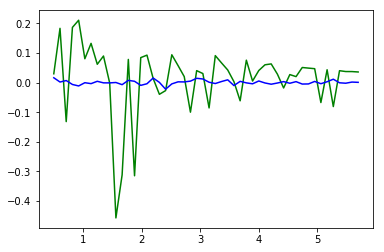

In [543]:
#np.random.seed(0)
S0=1.
N = 100
T = 1.
nu= 0.
sigma= 1.

Fewpaths = [GMBCallpriceError(50,N,T,S0,nu,sigma,strike) for strike in np.linspace(0.5,5.7,num=50)]
Manypaths = [GMBCallpriceError(10000,N,T,S0,nu,sigma,strike) for strike in np.linspace(0.5,5.7,num=50)]

plt.plot(np.linspace(0.5,5.7,num=50), Fewpaths, 'g')
plt.plot(np.linspace(0.5,5.7,num=50), Manypaths, 'b')

In [537]:
np.random.seed(0)
start = timer()
MCCallpricesGBM(npaths = 10000,N = 100,T = 1.,S0 = 1.,nu=1.,sigma=1.,strike = 10)
end = timer()
print(end - start)

1.67407202721


Simulating a path of Ornstein-Uhlenbeck process:

In [226]:
#np.random.seed(0)

def OrnsteinUhlenbeck(N,T,x,theta):
    Dt = 1/float(N)
    Z=np.random.normal(size=N)
    Y=[x]*N
    for i in range(N-1):
        Y[i+1]=Y[i] + (theta[0] - theta[1]*Y[i])*Dt + theta[2]*np.sqrt(Dt)*Z[i] 
    return Y

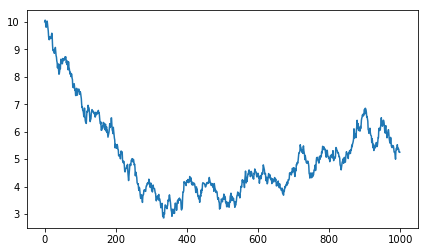

In [309]:
N = 1000
T = 1.
x = 10.
theta = [50,10,3.5]

OrnsteinUhlenbeckpath = OrnsteinUhlenbeck(N,T,x,theta)

plt.plot(OrnsteinUhlenbeckpath)

Simulating M paths of the Ornstein Uhlenbeck process

In [392]:
def PathsOrnsteinUhlenbeck(npaths,N,T,x,theta,seed=None):
    if seed is not None:
        np.random.seed(seed)
    Paths=[]
    for i in range(npaths):
        Paths.append(OrnsteinUhlenbeck(N,T,x,theta))
    return Paths

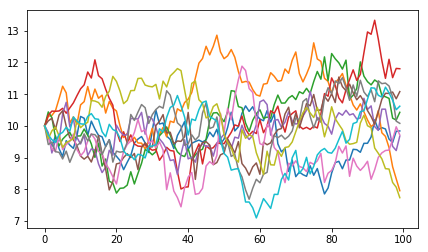

In [313]:
N = 100
T = 1.
x = 10.
theta = [50,5,3.5]
npaths = 10

PathsOU = PathsOrnsteinUhlenbeck(npaths,N,T,x,theta)

for p in PathsOU:
    plt.plot(p)

In [332]:
def CalloptionpricesOU(npaths,N,T,x,theta,strike):
    PathsOU = PathsOrnsteinUhlenbeck(npaths,N,T,x,theta)
    null = [0]*npaths
    strikes = np.array([strike]*npaths)
    lastvalues = np.array([p[-1] for p in PathsOU])
    callpayoffs = np.maximum(lastvalues-strikes,null)
    #lastvalues = [payoff(p[-1]) for p in PathsOU]
    averagepayoff = np.mean(callpayoffs)
    return averagepayoff

In [363]:
def Calloptionprices(npaths,N,T,x,theta,strike):
    PathsOU = PathsOrnsteinUhlenbeck(npaths,N,T,x,theta)
    pathwisepayoff = np.array([max(p[-1]-strike,0) for p in PathsOU])
    pv = np.mean(pathwisepayoff)
    return pv

Testing for speed with respect to the number of paths

In [522]:
np.random.seed(0)
start = timer()
Calloptionprices(npaths = 10000,N = 100,T = 1.,x = 10.,theta = [50,5,3.5],strike = 10)
end = timer()
print(end - start)

2.46712589264


To test the accuracy of the Euler methdod with respect to the number of paths we perform this calculation several times with the same number of paths but changing the random seed.

In [393]:
def Calloptionpricestest(npaths,N,T,x,theta,strike,seed=None):
    PathsOU = PathsOrnsteinUhlenbeck(npaths,N,T,x,theta,seed)
    pathwisepayoff = np.array([max(p[-1]-strike,0) for p in PathsOU])
    pv = np.mean(pathwisepayoff)
    return pv

In [394]:
np.random.seed(0)
npaths = 100
N = 100
T = 1.
x = 10.
theta = [50,5,3.5]
strike = 11

Calloptionprices(npaths,N,T,x,theta,strike)

0.064056945775523885

In [420]:
np.random.seed(2)
npathsrange = map(int,np.linspace(100,1000, 10))
N = 100
T = 1.
x = 10.
theta = [50,5,3.5]
strike = 11
seeds = range(100)

PVsbyNpaths = {npaths: [Calloptionpricestest(npaths,N,T,x,theta,strike, seed=s) for s in seeds] for npaths in npathsrange}
#Calloptionpricestest(npaths,N,T,x,theta,strike, seed=5)
#Callsbypaths = [Calloptionpricestest(npaths,N,T,x,theta,strike, seed=5) for npaths in npathss]

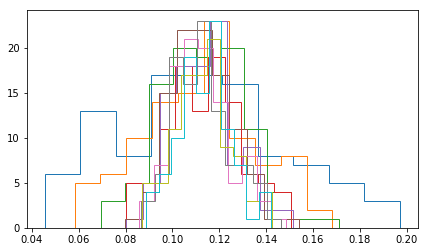

In [425]:
for k in sorted(PVsbyNpaths.keys()):
    #plt.hist(PVsbyNpaths[k], histtype='step')
    plt.plot(np.var(PVsbyNpaths[k]))

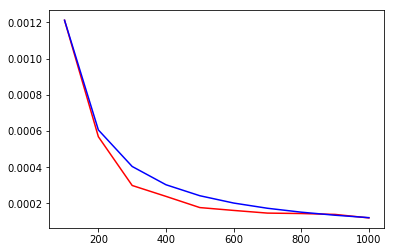

In [520]:
plt.plot(sorted(PVsbyNpaths.keys()),[np.var(PVsbyNpaths[k]) for k in sorted(PVsbyNpaths.keys())],'r')
plt.plot(sorted(PVsbyNpaths.keys()),np.var(PVsbyNpaths[100])*(100)/np.array(sorted(PVsbyNpaths.keys())),'b')

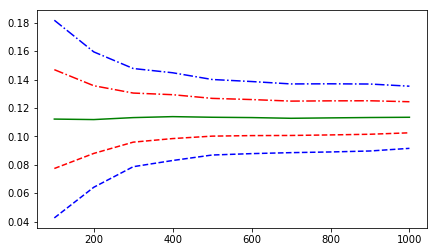

In [449]:
mean = [np.mean(PVsbyNpaths[k]) for k in sorted(PVsbyNpaths.keys())]
meanplusstd = [np.mean(PVsbyNpaths[k]) + np.sqrt(np.var(PVsbyNpaths[k])) for k in sorted(PVsbyNpaths.keys())]
meanminusstd = [np.mean(PVsbyNpaths[k]) - np.sqrt(np.var(PVsbyNpaths[k])) for k in sorted(PVsbyNpaths.keys())]
meanplus2std = [np.mean(PVsbyNpaths[k]) + 2*np.sqrt(np.var(PVsbyNpaths[k])) for k in sorted(PVsbyNpaths.keys())]
meanminus2std = [np.mean(PVsbyNpaths[k]) - 2*np.sqrt(np.var(PVsbyNpaths[k])) for k in sorted(PVsbyNpaths.keys())]
#plt.plot(sorted(PVsbyNpaths.keys()),[np.mean(PVsbyNpaths[k]) for k in sorted(PVsbyNpaths.keys())],'g')
plt.plot(sorted(PVsbyNpaths.keys()),mean,'g')
plt.plot(sorted(PVsbyNpaths.keys()),meanplusstd,'r-.')
plt.plot(sorted(PVsbyNpaths.keys()),meanminusstd,'r--')
plt.plot(sorted(PVsbyNpaths.keys()),meanplus2std,'b-.')
plt.plot(sorted(PVsbyNpaths.keys()),meanminus2std,'b--')

In [ ]:
plt.hist(PVsbyNpaths[100], histtype='step')

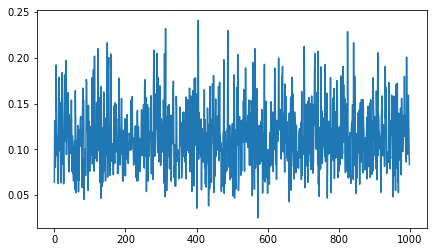

In [416]:
seeds = range(100)

callrange = [Calloptionpricestest(npaths,N,T,x,theta,strike, seed=s) for s in seeds]
plt.plot(callrange)

(array([   6.,   81.,  165.,  251.,  240.,  137.,   67.,   31.,   18.,    4.]),
 array([ 0.02502455,  0.04663122,  0.06823789,  0.08984457,  0.11145124,
         0.13305792,  0.15466459,  0.17627127,  0.19787794,  0.21948462,
         0.24109129]),
 <a list of 1 Patch objects>)

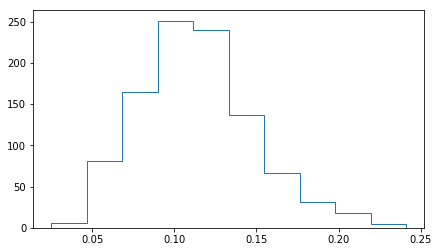

In [417]:
plt.hist(callrange, histtype='step')

In [385]:
npaths = 100
N = 100
T = 1.
x = 10.
theta = [50,5,3.5]
strike = 11

np.random.seed(2)
Calloptionprices(npaths,N,T,x,theta,strike)
np.random.seed(3)
Calloptionprices(npaths,N,T,x,theta,strike)

0.08020206088710008

$$ THE \quad MILSTEIN \quad SCHEME: $$

For a general SDE  on $t \in [0,T]$ described as
$$dX_t=a(X_t)dt+b(X_t)dW_t, \quad X_0=x.$$

The Milstein scheme reads for $N$ timesteps on $[0,T]$ with $Dt:=T/N$ as

$$X_{n+1}=X_{n}+a(X_n)Dt + b(X_n)(W_{t_{n+1}}-W_{t_n})+\frac{1}{2}b(X_n)b'(X_n)((W_{t_{n+1}}-W_{t_n})^2-Dt).$$

Note that the first part of the scheme coincides with the Euler (aka Euler-Marujama) scheme. Hence the convergence is at least as good.

The Milstein Scheme for GBM:

$$dX_t=\mu X_tdt+\sigma X_dWt,$$ where we take the log-transformed SDE: $Y_t:=ln(X_t)$ for the approximation:

$$dY_t=(\mu-\frac{1}{2}\sigma^2)dt+\sigma dW_t$$ and plugging back to $\exp(\dot)$ yields

$$X_{t+Dt}=X_t \exp\left(1+ \mu Dt -\frac{1}{2}\sigma^2 Dt +\sigma (W_{t_{n+1}}-W_{t_n}) +\frac{1}{2}\sigma^2(W_{t_{n+1}}-W_{t_n})^2\right).$$
That is:
$$X_{n+1}=X_{n}+a(X_n)Dt + b(X_n)(W_{t_{n+1}}-W_{t_n})+\frac{1}{2}b(X_n)b'(X_n)((W_{t_{n+1}}-W_{t_n})^2-Dt),$$
with $a(x)=\mu x$ and $b(x)=\sigma x$.

In [676]:
def MilsteinGBMwithDrift(N,T,nu,sigma,S0):
    Dt = T/float(N)
    Z=np.random.normal(size=N)
    S=[S0]*N
    for i in range(N-1):
        S[i+1]=S[i]*(1+ nu*Dt-0.5*sigma**2*Dt) + S[i]*sigma*np.sqrt(Dt)*(Z[i]+0.5*sigma*np.sqrt(Dt)*Z[i]**2)
    return S

Recall the Euler scheme from above:

In [721]:
#def GBMwithDriftI(N,T,nu,sigma,S0):
#    Dt = T/float(N)
#    Z=np.random.normal(size=N)
#    S=[S0]*N
#    for i in range(N-1):
#        S[i+1]=S[i]*(1+ nu*Dt) + S[i]*sigma*np.sqrt(Dt)*Z[i] 
#    return S

Comparison of Milstein Scheme with the Euler Scheme:

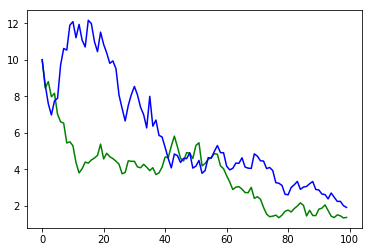

In [680]:
#np.random.seed(0)
S0=1.
N = 100
T = 1.
S0 = 10.
sigma = 1.
mu = 0.

GBMwithdriftPathEuler = GBMwithDriftI(N,T,nu,sigma,S0)
GBMwithdriftPathMilstein = MilsteinGBMwithDrift(N,T,nu,sigma,S0)

plt.plot(GBMwithdriftPathEuler, 'g')
plt.plot(GBMwithdriftPathMilstein, 'b')

THE CEV Model:
$$dS_t=\sigma S^{\beta}_tdW_t, \quad S_0=x \quad \textrm{for} \quad \beta\in[0,1].$$

Note that the parameter $\beta$ interpolates between the cases "Brownian motion" ($\beta=0$) and "Geometric Brownian motion" ($\beta=1$).

In [725]:
def CEVmodelNaive(N,T,beta,sigma,S0):
    Dt = T/float(N)
    Z=np.random.normal(size=N)
    S=[S0]*N
    eps=0.000001
    for i in range(N-1):
            S[i+1]= S[i]+S[i]**(beta)*sigma*np.sqrt(Dt)*Z[i] 
    return S

/Users/blanka/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


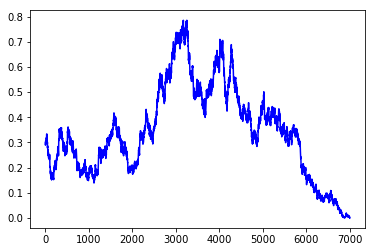

In [733]:
np.random.seed(100)
CEVPathNaive = CEVmodelNaive(N = 10000,T =1. ,beta = 0.4,sigma = 1.,S0=0.3)

plt.plot(CEVPathNaive, 'b')


Note that the simulaton terminates as the process hits a negative value. One way out is to set the value of the process to zero as soon as it becomes smaller than a threshold (eps):

In [689]:
def CEVmodel(N,T,beta,sigma,S0):
    Dt = T/float(N)
    Z=np.random.normal(size=N)
    S=[S0]*N
    eps=0.000001
    for i in range(N-1):
        if S[i]< eps:
            S[i+1]=0
        else:
            S[i+1]= S[i]+S[i]**(beta)*sigma*np.sqrt(Dt)*Z[i] 
    return S

This however will cause an expectation bias.

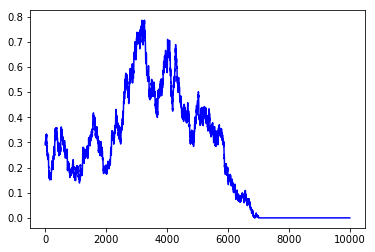

In [734]:
np.random.seed(100)
CEVPath = CEVmodel(N = 10000,T =1. ,beta = 0.4,sigma = 1.,S0=0.3)

plt.plot(CEVPath, 'b')

THE (uncorrelated) SABR Model:
$$dS_t=\Sigma_t S^{\beta}_tdW_t, \quad S_0=x \quad \textrm{for} \quad \beta\in[0,1].$$
$$d \Sigma_t = \sigma \Sigma_t dZ_t. \quad \Sigma_0=y, \quad \textrm{for} \quad \sigma>0.$$

Note that the volatility now is stochastic, descirbed by a Geometric Brownian motion. To introduce correlation one can set $$Z=\rho W + \sqrt{1-\rho^2}W^{\bot}.$$

In [713]:
def SABR(N,T,beta,sigma,x,y,rho=None):
    Sigma=GBMwithDriftI(N,T,0,sigma,y)
    Dt = T/float(N)
    W=np.random.normal(size=N)
    S=[x]*N
    eps=0.000001
    for i in range(N-1):
        if S[i]< eps:
            S[i+1]=0
        else:
            S[i+1]= S[i]+S[i]**(beta)*Sigma[i]*np.sqrt(Dt)*W[i] 
    return S
    

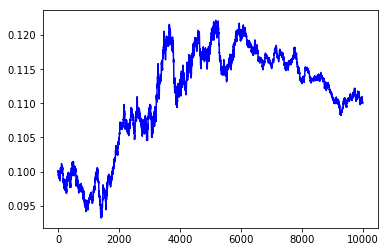

In [736]:
np.random.seed(100)
SABRPath = SABR(N = 10000,T =1. ,beta = 0.4,sigma = 1.,x=0.1, y=0.05)
plt.plot(SABRPath, 'b')